In [3]:
3.
import torch
import torch.nn.functional as F
import math
def scaled_dot_product_attention(Q, K, V):
  d_k = Q.size(-1)
  scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_k)


  attention_weights = F.softmax(scores, dim=-1)
  output = torch.matmul(attention_weights, V)

  return output, attention_weights


In [7]:
4.
def masked_scaled_dot_product_attention(Q, K, V):
    d_k = Q.size(-1)
    seq_len = Q.size(0)

    # Compute raw scores
    scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_k)

    # Create upper-triangular mask
    mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1)

    # Apply mask (future tokens → -inf)
    scores = scores.masked_fill(mask == 1, float('-inf'))

    # Softmax after masking
    attention_weights = F.softmax(scores, dim=-1)

    # Attention output
    output = torch.matmul(attention_weights, V)

    return output, attention_weights




    masked_output, masked_weights = masked_scaled_dot_product_attention(Q, K, V)

    print("Masked Attention Weights:\n", masked_weights)



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

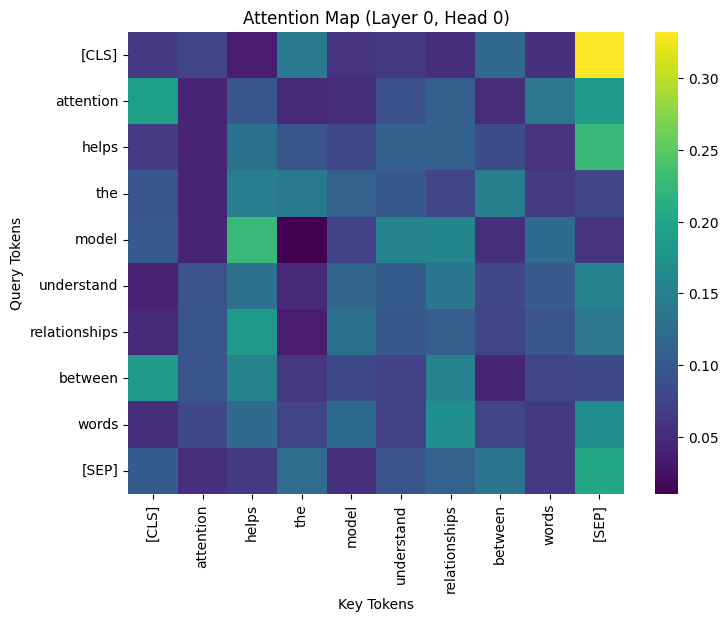

In [8]:


# Import libraries
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel

# Load pretrained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained(
    "bert-base-uncased",
    output_attentions=True
)

model.eval()

# Input sentence
sentence = "Attention helps the model understand relationships between words"
inputs = tokenizer(sentence, return_tensors="pt")

# Forward pass to get attentions
with torch.no_grad():
    outputs = model(**inputs)

attentions = outputs.attentions

# Select layer and head
layer = 0   # first layer
head = 0    # first head

attention_matrix = attentions[layer][0][head]
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot attention heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    attention_matrix,
    xticklabels=tokens,
    yticklabels=tokens,
    cmap="viridis"
)
plt.title(f"Attention Map (Layer {layer}, Head {head})")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.show()